# A 12
# a)

In [113]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

def cubic_spline_sparse(x_range, y_range):
    rank = len(x_range)

    lambda0 = 0
    mu0 = 1
    b0 = 0

    h_range = np.diff(x_range)

    diag0 = np.array([*h_range[1:] / 6, lambda0, lambda0])
    diag1 = np.array([mu0, *(h_range[:-1]+h_range[1:]) / 3, mu0])
    diag2 = np.array([lambda0, lambda0, *h_range[:-1] / 6])

    data = np.array([diag0, diag1, diag2])
    offsets = np.array([-1, 0, 1])

    a_mat = sparse.dia_matrix((data, offsets), shape=(rank, rank))

    b_range = np.diff(np.diff(y_range) / h_range, prepend=b0, append=b0)

    m_range = sparse.linalg.spsolve(a_mat, b_range)

    return h_range, m_range


def spline_func(x_val, x_range, y_range, h_range, m_range):
    idx = np.where(np.greater_equal(x_range, x_val))[0][0]
    if idx >= len(h_range)-1:
        idx = len(h_range)-1
    
    c = (y_range[idx + 1] - y_range[idx]) / h_range[idx] - h_range[idx] / 6 * (m_range[idx + 1] - m_range[idx])
    d = y_range[idx] - h_range[idx] ** 2 / 6 * m_range[idx]
    ret = ((x_range[idx + 1] - x_val)**3 / h_range[idx] * m_range[idx] + 
           (x_val - x_range[idx])**3 / h_range[idx] * m_range[idx + 1]) / 6 + c * (x_val - x_range[idx]) + d

    return ret

spline_func = np.vectorize(spline_func, excluded=[1,2,3,4])

# b)

/tmp/ipykernel_61475/3173876301.py:25: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  m_range = sparse.linalg.spsolve(a_mat, b_range)


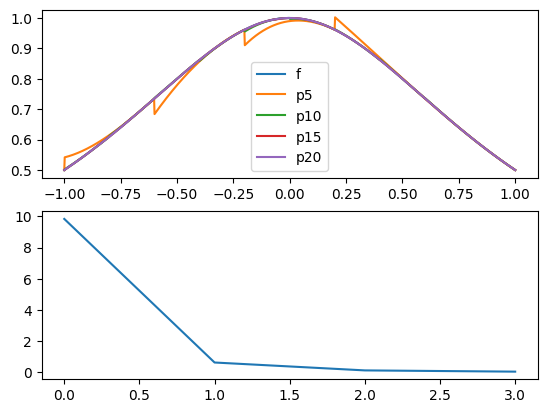

In [114]:
x_plot = np.linspace(-1, 1, 1000)
func_plot = 1 / (1 + x_plot**2)
fig, ax = plt.subplots(2)
ax[0].plot(x_plot, func_plot, label='f')

error_list = []

for n in range(5, 25, 5):
    i_range = np.arange(n+1)
    h = 2/n
    x_range = -1 + h * i_range
    y_range = 1 / (1 + x_range**2)

    h_range, m_range = cubic_spline_sparse(x_range, y_range)

    spline_plot = spline_func(x_plot, x_range, y_range, h_range, m_range)
    error_list.append(np.linalg.norm(func_plot - spline_plot, ord=1))

    ax[0].plot(x_plot, spline_plot, label='p%i' %n)
ax[0].legend()
ax[1].plot(error_list)

/tmp/ipykernel_61475/3173876301.py:25: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  m_range = sparse.linalg.spsolve(a_mat, b_range)


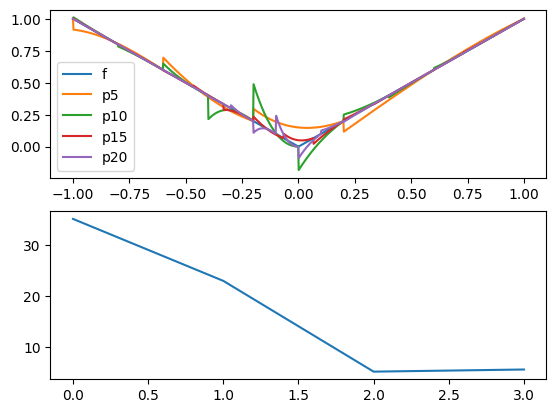

In [115]:
x_plot = np.linspace(-1, 1, 1000)
func_plot = np.abs(x_plot)
fig, ax = plt.subplots(2)
ax[0].plot(x_plot, func_plot, label='f')

error_list = []

for n in range(5, 25, 5):
    i_range = np.arange(n+1)
    h = 2/n
    x_range = -1 + h * i_range
    y_range = np.abs(x_range)

    h_range, m_range = cubic_spline_sparse(x_range, y_range)

    spline_plot = spline_func(x_plot, x_range, y_range, h_range, m_range)
    error_list.append(np.linalg.norm(func_plot - spline_plot, ord=1))

    ax[0].plot(x_plot, spline_plot, label='p%i' %n)
ax[0].legend()
ax[1].plot(error_list)